In [77]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import sklearn

**Reading the data and understanding its structure**

In [78]:
data = pd.read_csv("iris.data", index_col=False, names = ["sepal length in cm ","sepal width in cm","petal length in cm","petal width in cm","Type"])

In [79]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
data.shape

(150, 5)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length in cm   150 non-null    float64
 1   sepal width in cm    150 non-null    float64
 2   petal length in cm   150 non-null    float64
 3   petal width in cm    150 non-null    float64
 4   Type                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Converting object variable to numerical value**

In [83]:
#Iris Setosa = 0
#Iris Versicolour = 1
#Iris Virginica = 2
data.Type.replace(to_replace=["Iris-setosa","Iris-versicolor","Iris-virginica"],value=["0","1","2"],regex=True,inplace=True)

In [84]:
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length in cm   150 non-null    float64
 1   sepal width in cm    150 non-null    float64
 2   petal length in cm   150 non-null    float64
 3   petal width in cm    150 non-null    float64
 4   Type                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [90]:
data[["Type"]]=data[["Type"]].astype(int)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length in cm   150 non-null    float64
 1   sepal width in cm    150 non-null    float64
 2   petal length in cm   150 non-null    float64
 3   petal width in cm    150 non-null    float64
 4   Type                 150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [92]:
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [94]:
data.isna().any()

sepal length in cm     False
sepal width in cm      False
petal length in cm     False
petal width in cm      False
Type                   False
dtype: bool

**Data Visualization**

In [95]:
import seaborn as sns


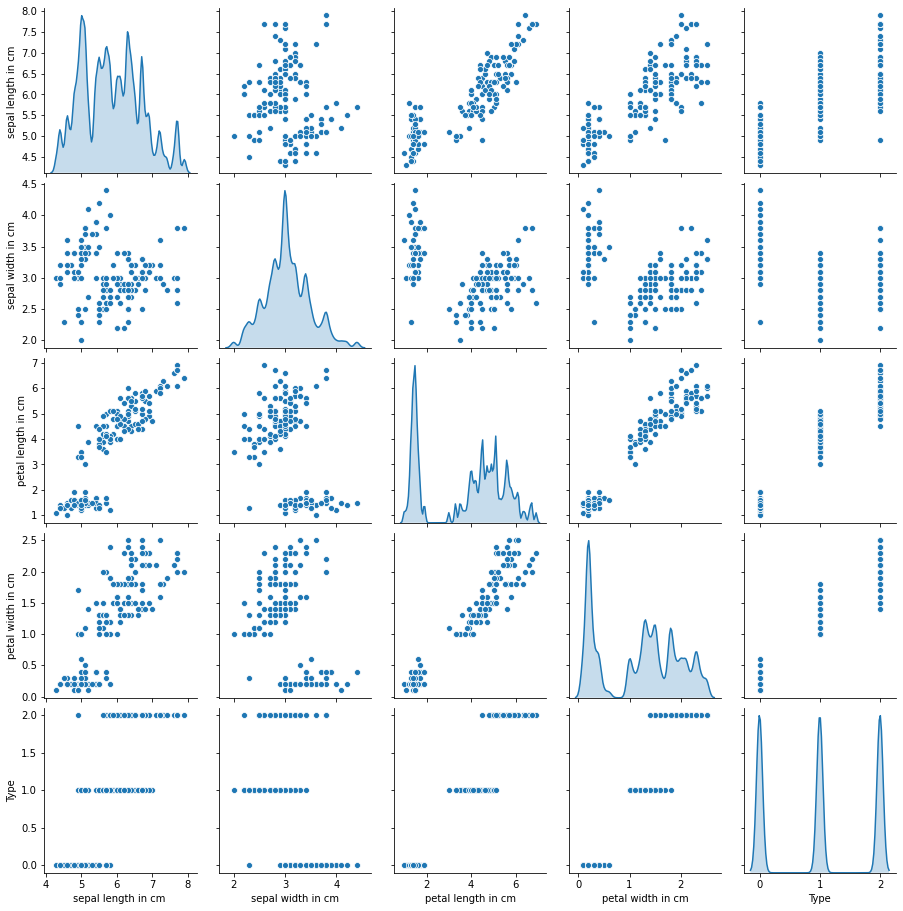

In [101]:
sns.pairplot(data, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()


**Splitting the data into training and testing**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [129]:
Y = data["Type"]
X = data.drop(["Type"],axis=1)

In [130]:
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [131]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Type, Length: 150, dtype: int64

In [132]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.3,random_state=42)

In [133]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(105, 4)
(105,)
(45, 4)
(45,)


**Fitting the model using SVM(linear kernel)**

In [136]:
clf = svm.SVC(kernel = "linear")
clf.fit(train_X, train_Y)

SVC(kernel='linear')

In [137]:
result = clf.predict(test_X)

In [138]:
result

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

**Evaluation of the algorithm**